In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## Importando dados para A EDA 
df = pd.read_csv('./data/netflix daily top 10.csv')

## Questions Of EDA
    
    - Tipos de dados disponíveis 
    - Período da análise feita 
    - Tamanho da base de dados 
    - Verificar dados nulos
    - Outliers

In [3]:
## Pegando informação dos tipos de dados e Verificando dados Nulos

# [X] Verificar dados Nulos
# [X] Tipos de dados disponíveis 

index = df['Netflix Exclusive'].isna()
print('Valores nulos da coluna Netlix Exclusive: ',len(df[index]['Netflix Exclusive']))

df.info()


Valores nulos da coluna Netlix Exclusive:  2501
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [4]:
## Analisando tipos de dados disponíveis

# [X] Período da análise feita 

print(f'Período da análise: de',df['As of'].min() ,' a ',  df['As of'].max(),'. ')

Período da análise: de 2020-04-01  a  2022-03-11 . 


In [5]:
## Buscando o shape do dataframe

# [X] Tamanho da base de dados 

print('Registros na Base de dados ', df.shape[0])
print('Atributos da Base de dados ', df.shape[1])

Registros na Base de dados  7100
Atributos da Base de dados  10


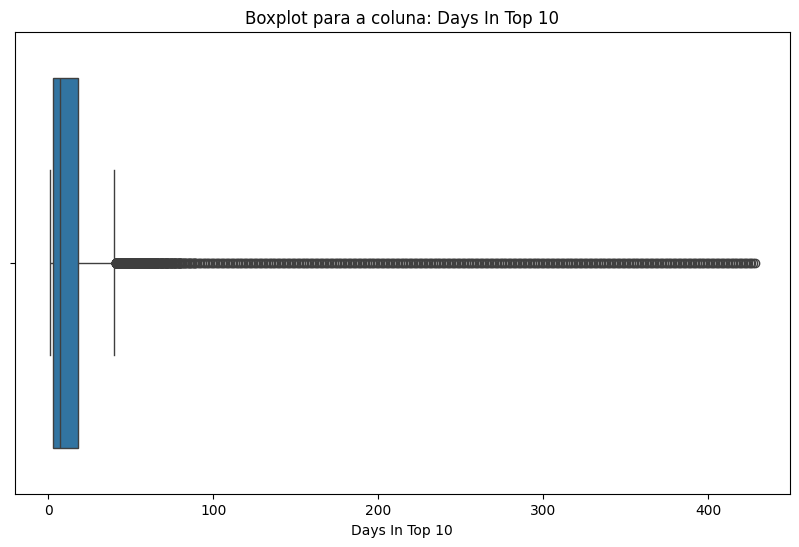

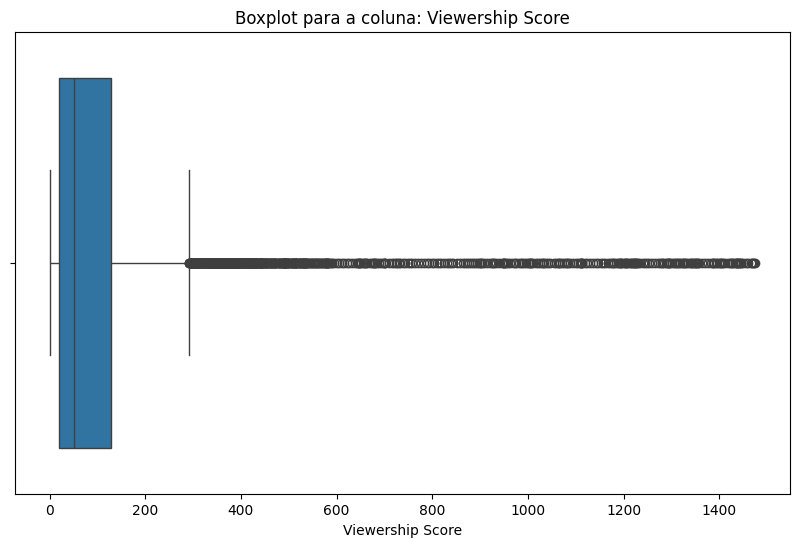

,Rank,Days In Top 10,Viewership Score
count,5976.000000,5976.000000,5976.000000
mean,5.431058,8.111780,54.194946
std,2.879667,6.823971,49.397715
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,16.000000
50%,5.000000,6.000000,38.000000
75%,8.000000,11.000000,79.000000
max,10.000000,40.000000,204.000000


In [6]:
## Identificando Outliers

# Identificar colunas do tipo int64
int64_columns = df.select_dtypes(include=['int64']).columns

# Criar gráficos de boxplot para cada coluna int64 (Exceto a de Rank)
for col in int64_columns:
    if col != 'Rank':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot para a coluna: {col}')
        plt.xlabel(col)
        plt.show()

# Remove Outliers do dataframe
for col in int64_columns:
    if col != 'Rank':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.describe()

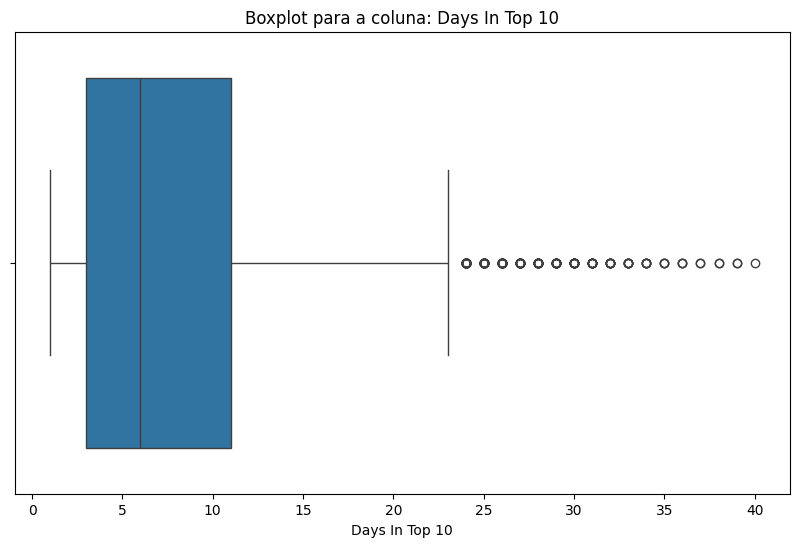

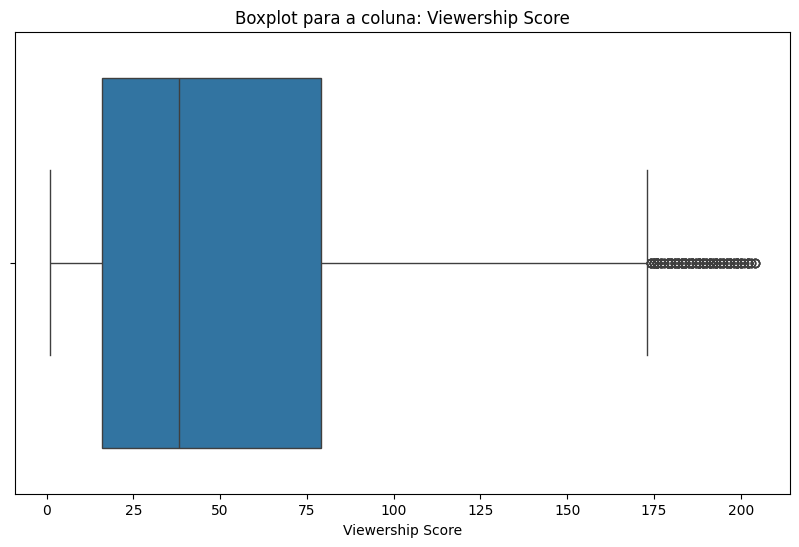

In [8]:
# Criar gráficos de boxplot para cada coluna int64 (Exceto a de Rank) No novo DataFrame
for col in int64_columns:
    if col != 'Rank':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot para a coluna: {col}')
        plt.xlabel(col)
        plt.show()